In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import os

import seaborn as sns
sns.set(font_scale=2, style="white")
from pathlib import Path

import plotly.express as px
import plotly.graph_objects as go
pd.options.plotting.backend = 'plotly'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
from collections import Counter
from itertools import chain

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.rcParams['figure.figsize'] = (12, 5)

from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
import plotly.express as px

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, validation_curve
from sklearn.metrics import log_loss, accuracy_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np

%config InlineBackend.figure_format ='retina'

In [3]:
country_dat_dict = {}
count = 0
for root, dirs, files  in os.walk("youtube_data"):
    for file in files:
        if file[-3:] == "csv":
            try: 
                data = pd.read_csv(str(root+"/"+ file))
                country_dat_dict[file[:2]] = data
                data["country"] = file[:2]
                count += data.shape[0]
            except:
                continue;

In [4]:
video = pd.concat(country_dat_dict.values(),ignore_index=True)
video

video_id trending_date  \
0       kzwfHumJyYc      17.14.11   
1       zUZ1z7FwLc8      17.14.11   
2       10L1hZ9qa58      17.14.11   
3       N1vE8iiEg64      17.14.11   
4       kJzGH0PVQHQ      17.14.11   
...             ...           ...   
239657  l884wKofd54      18.14.06   
239658  IP8k2xkhOdI      18.14.06   
239659  Il-an3K9pjg      18.14.06   
239660  -DRsfNObKIQ      18.14.06   
239661  4YFo4bdMO8Q      18.14.06   

                                                    title  \
0       Sharry Mann: Cute Munda ( Song Teaser) | Parmi...   
1       पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...   
2       Stylish Star Allu Arjun @ ChaySam Wedding Rece...   
3                          Eruma Saani | Tamil vs English   
4       why Samantha became EMOTIONAL @ Samantha naga ...   
...                                                   ...   
239657  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
239658  Jacob Sartorius - Up With It (Official Music V...   
239659                 Anne-Marie - 2002 [Official Video]   
239660  Eleni Foureira - Fuego - Cyprus - LIVE - First...   
239661  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   

                  channel_title  category_id              publish_time  \
0               Lokdhun Punjabi            1  2017-11-12T12:20:39.000Z   
1                       HJ NEWS           25  2017-11-13T05:43:56.000Z   
2                          TFPC           24  2017-11-12T15:48:08.000Z   
3                   Eruma Saani           23  2017-11-12T07:08:48.000Z   
4                    Filmylooks           24  2017-11-13T01:14:16.000Z   
...                         ...          ...                       ...   
239657      EnriqueIglesiasVEVO           10  2018-05-09T07:00:01.000Z   
239658          Jacob Sartorius           10  2018-05-11T17:09:16.000Z   
239659               Anne-Marie           10  2018-05-08T11:05:08.000Z   
239660  Eurovision Song Contest           24  2018-05-08T20:32:32.000Z   
239661           SuperDuperKyle           10  2018-05-11T04:06:35.000Z   

                                                     tags     views   likes  \
0       sharry mann|"sharry mann new song"|"sharry man...   1096327   33966   
1       पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...    590101     735   
2       Stylish Star Allu Arjun @ ChaySam Wedding Rece...    473988    2011   
3       Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...   1242680   70353   
4       Filmylooks|"latest news"|"telugu movies"|"telu...    464015     492   
...                                                   ...       ...     ...   
239657  Enrique Iglesias feat. Pitbull|"MOVE TO MIAMI"...  25066952  268088   
239658  jacob sartorius|"jacob"|"up with it"|"jacob sa...   1492219   61998   
239659  anne|"marie"|"anne-marie"|"2002"|"two thousand...  29641412  394830   
239660  Eurovision Song Contest|"2018"|"Lisbon"|"Cypru...  14317515  151870   
239661  Kyle|"SuperDuperKyle"|"Ikuyo"|"2 Chainz"|"Soph...    607552   18271   

        dislikes  comment_count  \
0            798            882   
1            904              0   
2            243            149   
3           1624           2684   
4            293             66   
...          ...            ...   
239657     12783           9933   
239658     13781          24330   
239659      8892          19988   
239660     45875          26766   
239661       274           1423   

                                        thumbnail_link  comments_disabled  \
0       https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg              False   
1       https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg               True   
2       https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg              False   
3       https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg              False   
4       https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg              False   
...                                                ...                ...   
239657  https://i.ytimg.com/vi/l884

In [5]:
video.describe()

category_id         views         likes      dislikes  comment_count
count  239662.000000  2.396620e+05  2.396620e+05  2.396620e+05   2.396620e+05
mean       20.002950  1.898465e+06  5.218776e+04  2.849046e+03   5.632043e+03
std         7.271423  8.746280e+06  1.950500e+05  2.703692e+04   2.951592e+04
min         1.000000  2.230000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%        17.000000  8.385125e+04  1.277000e+03  7.300000e+01   1.760000e+02
50%        24.000000  3.082685e+05  6.522000e+03  2.960000e+02   7.910000e+02
75%        24.000000  1.041631e+06  2.895575e+04  1.126000e+03   3.043000e+03
max        44.000000  4.245389e+08  5.613827e+06  1.944971e+06   1.626501e+06

In [6]:
video["trending_date"] = video["trending_date"].apply(lambda string: pd.to_datetime(string, format = '%y.%d.%m'))

In [7]:
# Handle missing value
missing_values = video.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(f'Columns with missing value: {missing_columns}')

# Impute missing values in the description column with NaN
video['description'] = video['description'].fillna('NaN')

Columns with missing value: description    7503
dtype: int64


In [8]:
def tagstr_to_list(string:str):
    return [tag.strip('"').strip().lower() for tag in string.split("|")]
    
video["tags"] = video.tags.apply(tagstr_to_list)

In [9]:
video['likes_to_views'] = np.where(video['views'] > 0,
                                   video['likes'] / video['views'],
                                   np.nan)

video['trending_date'] = pd.to_datetime(video['trending_date'], errors='coerce', utc=True)
video['publish_time']   = pd.to_datetime(video['publish_time'],   errors='coerce', utc=True)

idx_last = video.groupby('video_id')['trending_date'].idxmax()
video_latest = video.loc[idx_last].copy()

video_latest['trending_dt_naive'] = video_latest['trending_date'].dt.tz_convert('UTC').dt.tz_localize(None)
video_latest['publish_dt_naive']  = video_latest['publish_time'].dt.tz_convert('UTC').dt.tz_localize(None)

video_latest['days_since_publish'] = (video_latest['trending_dt_naive'] - video_latest['publish_dt_naive']).dt.days

video_latest[['video_id','likes','views','likes_to_views','days_since_publish']].head()

video_id  likes    views  likes_to_views  days_since_publish
37194        #NAME?   5974  1014376        0.005889                   1
22921       #VALUE!   4930   206364        0.023890                   2
141129  --2K8l6BWfw    694     4822        0.143924                   0
118511  --45ws7CEN0   3837   309197        0.012410                  -1
123769  --728h8mnDY   2573    39535        0.065082                   1

In [10]:
video_latest

video_id             trending_date  \
37194        #NAME? 2018-06-14 00:00:00+00:00   
22921       #VALUE! 2018-03-21 00:00:00+00:00   
141129  --2K8l6BWfw 2018-03-06 00:00:00+00:00   
118511  --45ws7CEN0 2018-06-12 00:00:00+00:00   
123769  --728h8mnDY 2017-12-07 00:00:00+00:00   
...             ...                       ...   
87067   zzjNCiCqiOs 2017-12-28 00:00:00+00:00   
53118   zzokx9oX77k 2018-02-02 00:00:00+00:00   
140690  zzrPbAUv34s 2018-03-04 00:00:00+00:00   
146059  zztX9Vs1JDc 2018-03-31 00:00:00+00:00   
125733  zzz0_5fMnI8 2017-12-17 00:00:00+00:00   

                                                    title       channel_title  \
37194   #DeepthiSunaina Cheema joke chepthe navvali..N...            Star Maa   
22921   FARZAND | Official Teaser | Upcoming Marathi M...     Rajshri Marathi   
141129                   La Relève #2 : Jessica Rodrigues       Georgette Mag   
118511             PlayStation E3 2018 Showcase | English  PlayStation Europe   
123769                                    Rösti - YouCook     YouCook Cuisine   
...                                                   ...                 ...   
87067                                       the hell hole       westsidewillz   
53118   Tortë shum e shpejt, lehtë dhe me pak përbërës...    Rimonda Cookbook   
140690                                       EN ATTENDANT   Valentin En Grand   
146059  6 Astuces stupides mais qui ont le mérite de f...              Mr.Tom   
125733  Johnny Hally­day : pourquoi l'absence de Jacqu...            Les News   

        category_id              publish_time  \
37194            24 2018-06-12 05:44:19+00:00   
22921            24 2018-03-18 04:30:00+00:00   
141129           15 2018-03-05 13:37:34+00:00   
118511           20 2018-06-12 03:11:18+00:00   
123769           26 2017-12-05 16:30:00+00:00   
...             ...                       ...   
87067            28 2010-01-24 09:21:55+00:00   
53118            22 2018-02-01 21:52:23+00:00   
140690           24 2018-03-03 18:00:09+00:00   
146059           26 2018-03-30 16:30:05+00:00   
125733           25 2017-12-16 15:39:46+00:00   

                                                     tags    views  likes  \
37194   [comedy, action, entertainment, telugu, tollyw...  1014376   5974   
22921   [farzand, marathi movie farzand, marathi movie...   206364   4930   
141129  [jessica rodrigues, jumping, horse, cheval, po...     4822    694   
118511  [playstation, playstation 4, playstation europ...   309197   3837   
123769  [youcook, cuisine, recette, europe de l'ouest,...    39535   2573   
...                                                   ...      ...    ...   
87067   [hell, hole, dirtbikes, moto, hill, climbs, we...   727208   4987   
53118   [shqip, kosovo, torte, e shpejt, leht, shpejt,...     5798    309   
140690  [valentin, valentin en grand, en, grand, en at...     3174    783   
146059  [astuces stupides, astuces, fais le toi-même, ...     3439    182   
125733  [lesnew, jacques dutronc, pourquoi jacques dut...    19190     55   

        dislikes  comment_count  \
37194       1414           1132   
22921        111            252   
141129         4             34   
118511       516            278   
123769        51            269   
...          ...            ...   
87067        716            354   
53118         15             60   
140690         2            139   
146059        17             17   
125733         9              0   

                                        thumbnail_link  comments_disabled  \
37194   https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg              False   
22921   https://i.ytimg.com/vi/-G7-ryD4x4E/default.jpg              False   
141129  https://i.ytimg.com/vi/--2K8l6BWfw/default.jpg              False   
118511  https://i.ytimg.com/vi/--45ws7CEN0/default.jpg              False   
123769  https://i.ytimg.com/vi/--728h8mnDY/default.jpg              False   
...                                                .

# features

In [11]:
median_ratio = video_latest['likes_to_views'].median()
video_latest['above_median_engagement'] = (video_latest['likes_to_views'] > median_ratio).astype(int)

In [12]:
features = [
    'comment_count', 'days_since_publish',
    'category_id', 'comments_disabled', 'ratings_disabled',
    'video_error_or_removed'
]

X = video_latest[features]
y = video_latest['above_median_engagement']

In [13]:
X = X.fillna(0)

## EDA

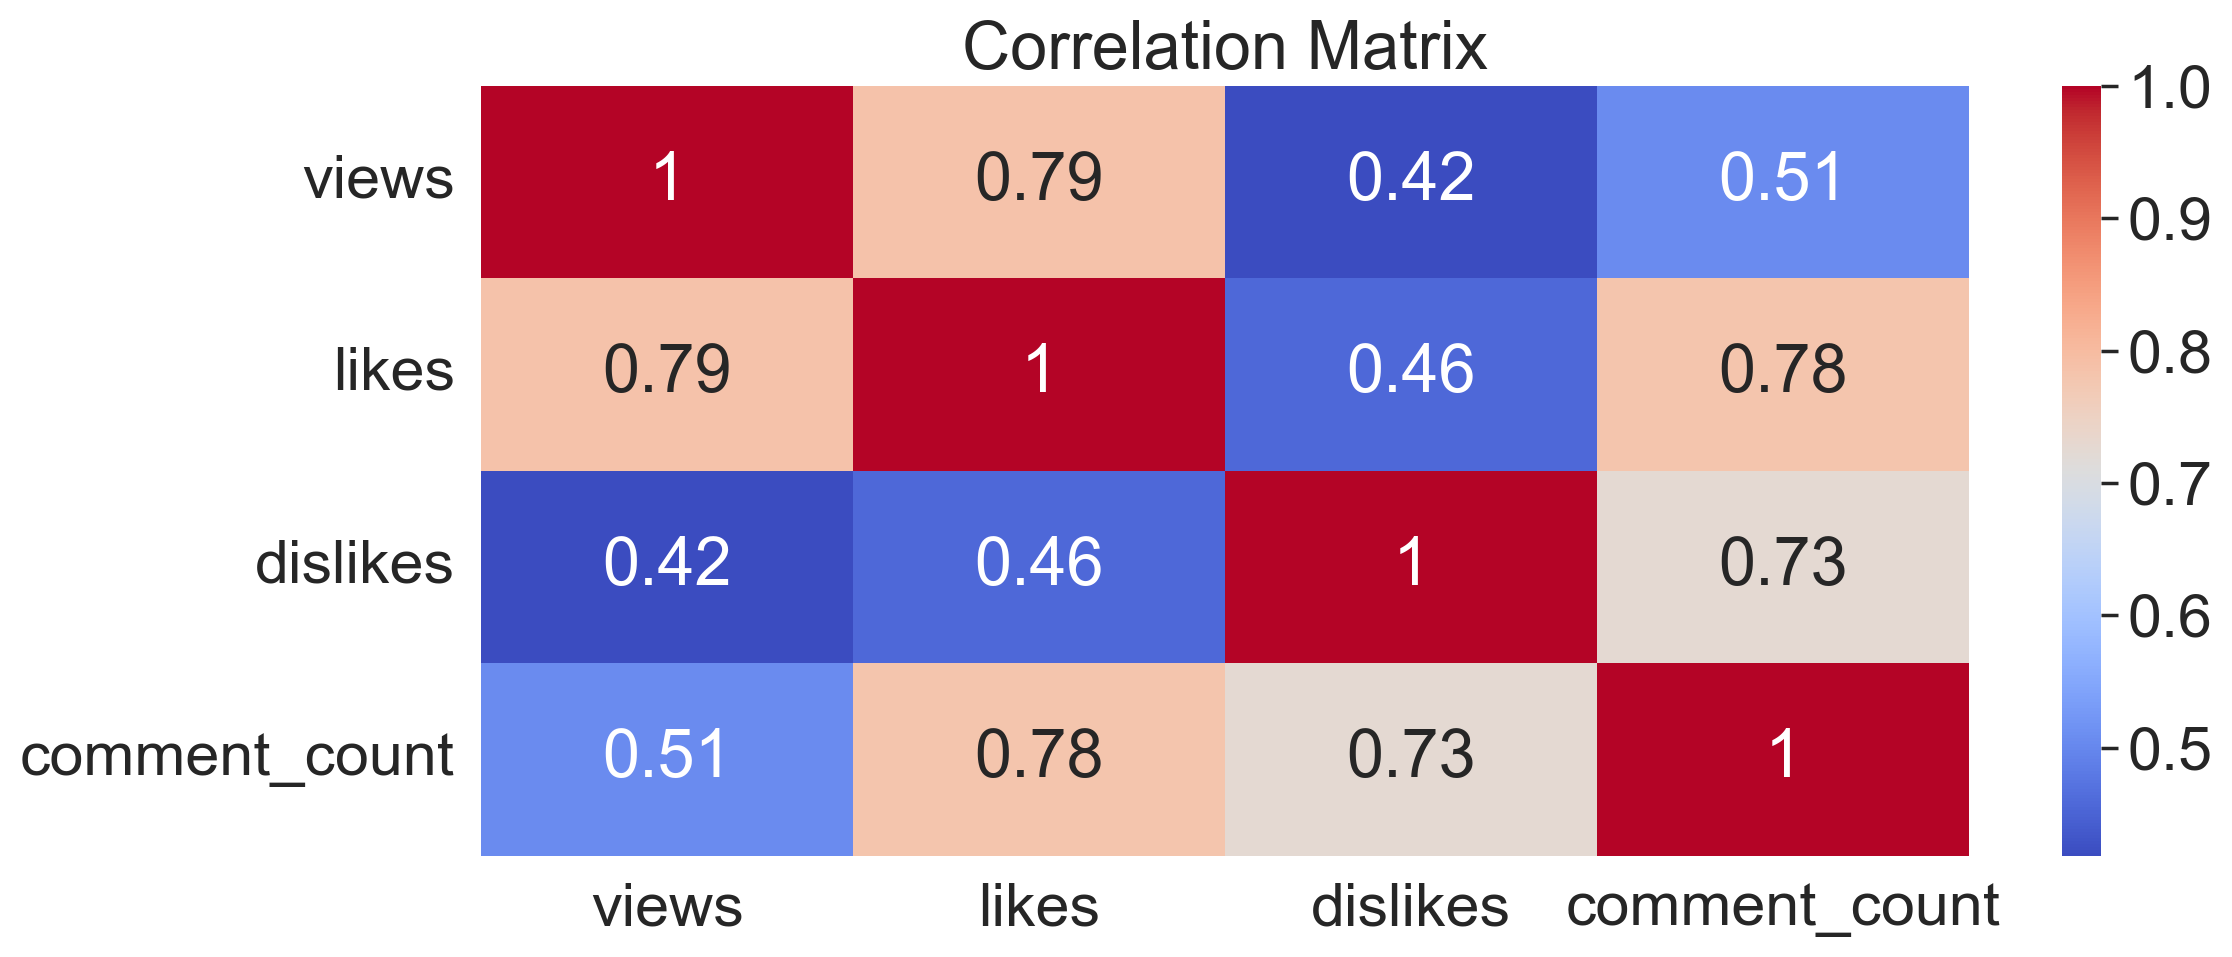

In [14]:
correlation = video[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

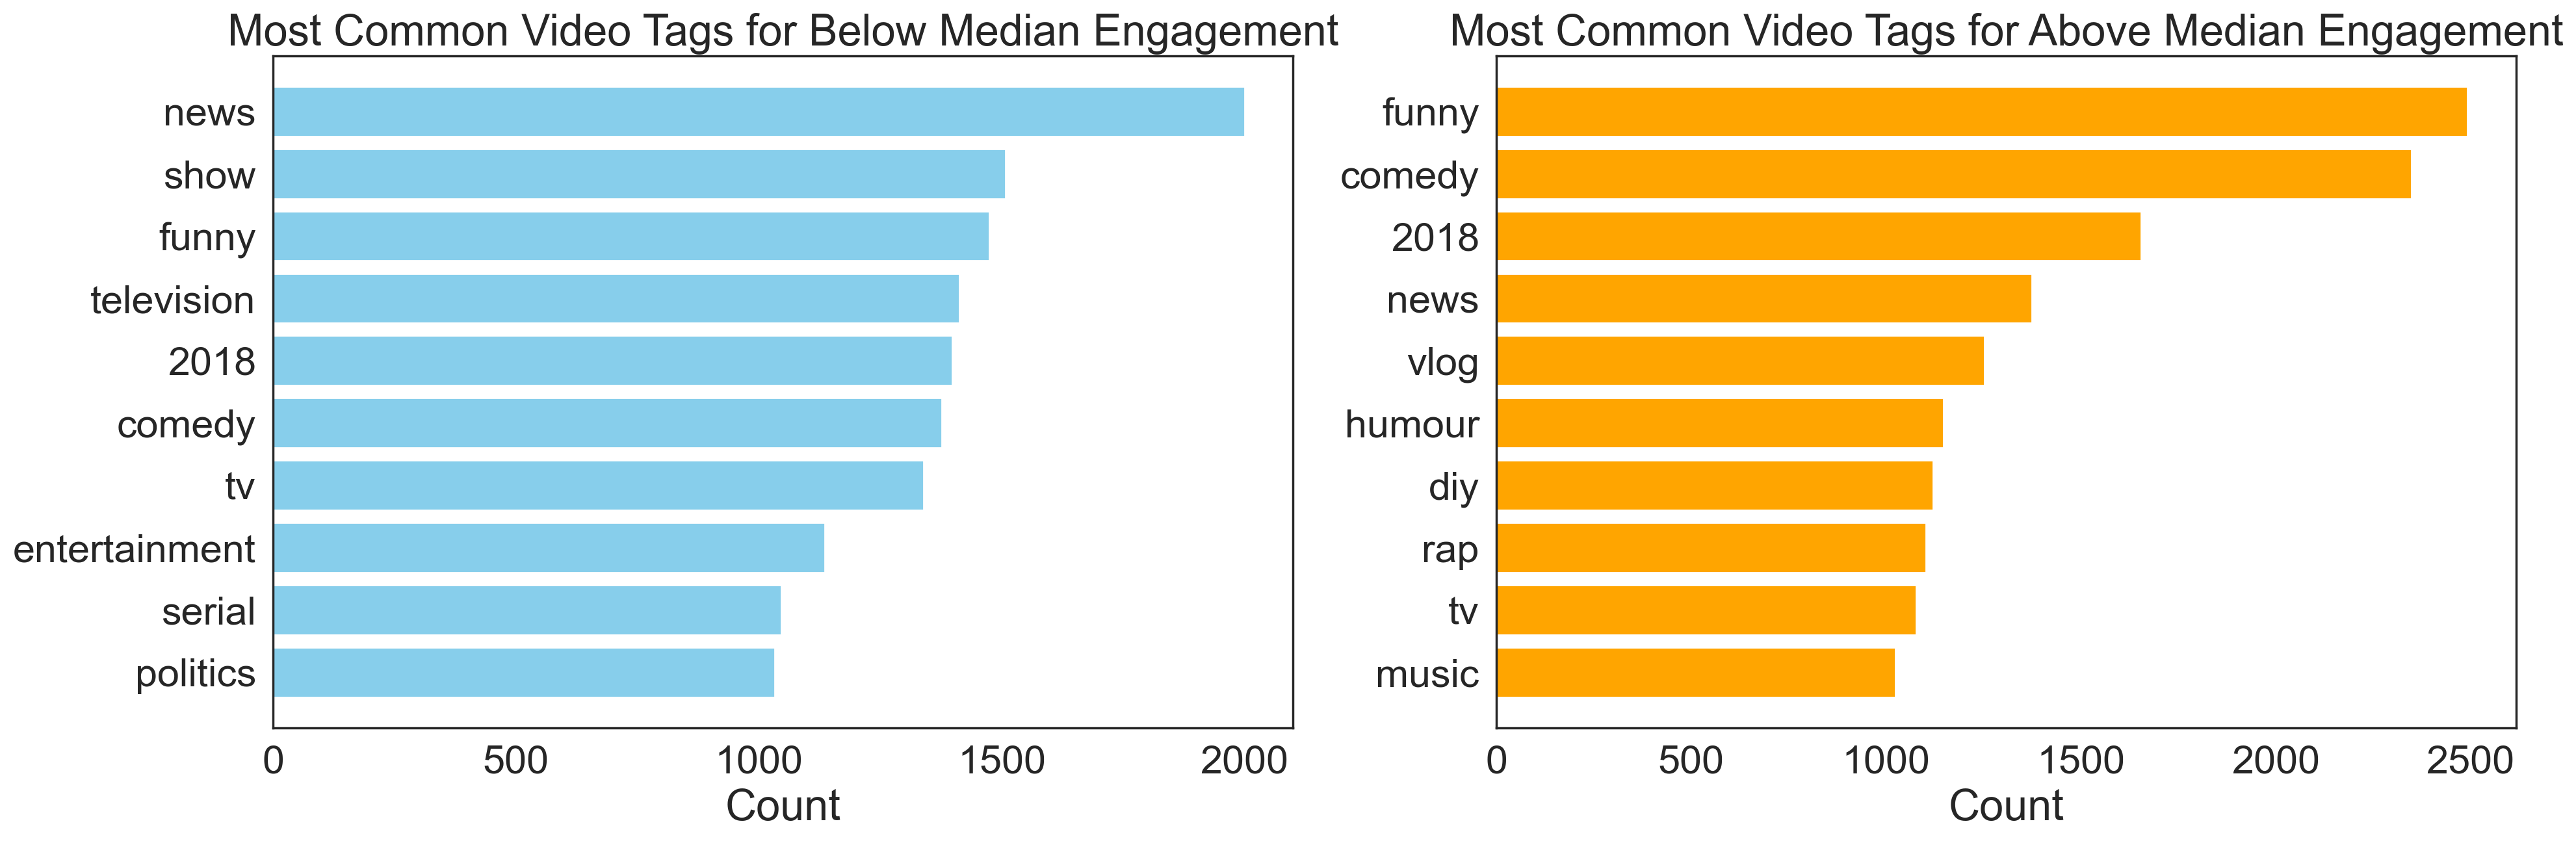

In [15]:
# Separate by engagement
above = video_latest[video_latest['above_median_engagement'] == 1]['tags']
below = video_latest[video_latest['above_median_engagement'] == 0]['tags']

# Remove 'none'
def remove_none(tags):
    return [t for t in tags if t.lower() != '[none]']

tags_above = list(chain.from_iterable(remove_none(tags) for tags in above))
tags_below = list(chain.from_iterable(remove_none(tags) for tags in below))

top_n = 10
common_above = Counter(tags_above).most_common(top_n)
common_below = Counter(tags_below).most_common(top_n)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].barh([t[0] for t in reversed(common_below)], [t[1] for t in reversed(common_below)], color='skyblue')
axes[0].set_title('Most Common Video Tags for Below Median Engagement')
axes[0].set_xlabel('Count')
axes[1].barh([t[0] for t in reversed(common_above)], [t[1] for t in reversed(common_above)], color='orange')
axes[1].set_title('Most Common Video Tags for Above Median Engagement')
axes[1].set_xlabel('Count')
plt.tight_layout()
plt.show()

# Model 3 - Naive Bayes

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5101584937772577
              precision    recall  f1-score   support

           0       0.80      0.03      0.05      9401
           1       0.51      0.99      0.67      9401

    accuracy                           0.51     18802
   macro avg       0.65      0.51      0.36     18802
weighted avg       0.65      0.51      0.36     18802



In [17]:
import plotly.express as px
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Get predictions and probabilities
y_pred_test = clf.predict(X_test)
y_proba_test = clf.predict_proba(X_test)[:, 1]

test_acc = (y_test == y_pred_test).mean()
naive_acc = (y_test == y_test.mode()[0]).mean()

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

# Plot confusion matrix
fig_cm = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix (Naive Bayes)'
)
fig_cm.update_layout(template='plotly_white', xaxis_title='', yaxis_title='')
fig_cm.show()

print(f"Naive Bayes Test Accuracy: {test_acc:.4f}")
print(f"Naive Baseline Accuracy: {naive_acc:.4f}")

Naive Bayes Test Accuracy: 0.5102
Naive Baseline Accuracy: 0.5000


In [18]:
# Calculate training and test errors
y_train_pred = clf.predict(X_train)
y_train_proba = clf.predict_proba(X_train)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred_test)

train_error = 1 - train_acc
test_error = 1 - test_acc

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Error: {train_error:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Error: {test_error:.4f}")

error_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Error': [train_error, test_error],
    'Accuracy': [train_acc, test_acc]
})

fig_error = px.bar(
    error_df, x='Dataset', y='Error', text='Error',
    title='Training vs Test Error (Naive Bayes)',
    color='Dataset'
)
fig_error.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig_error.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_error.show()

Training Accuracy: 0.5106
Training Error: 0.4894
Test Accuracy: 0.5102
Test Error: 0.4898


In [19]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
auc_test = roc_auc_score(y_test, y_proba_test)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

fig_roc = px.line(roc_df, x='FPR', y='TPR', title=f'ROC Curve (Naive Bayes, AUC = {auc_test:.3f})')
fig_roc.add_shape(type='line', x0=0, x1=1, y0=0, y1=1, line=dict(dash='dash', color='red'))
fig_roc.update_layout(template='plotly_white')
fig_roc.show()

print(f"Naive Bayes ROC-AUC: {auc_test:.4f}")

Naive Bayes ROC-AUC: 0.6029


In [20]:
# Calculate naive baseline
naive_acc = (y_test == y_test.mode()[0]).mean()

# Model accuracy vs naive baseline
acc_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Naive Baseline'],
    'Accuracy': [test_acc, naive_acc]
})

fig_acc = px.bar(
    acc_df, x='Model', y='Accuracy', text='Accuracy',
    title='Accuracy: Naive Bayes vs. Naive Baseline',
    color='Model'
)
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_acc.show()

print(f"Naive Bayes beats baseline by: {(test_acc - naive_acc):.4f}")

Naive Bayes beats baseline by: 0.0102


## Variants 1 - Standardlization for Naive Bayes

In [21]:
features = [
    'comment_count', 'days_since_publish',
    'category_id', 'comments_disabled', 'ratings_disabled',
    'video_error_or_removed'
]

X_nb_var_1 = video_latest[features]
y_nb_var_1 = video_latest['above_median_engagement']

scaler = StandardScaler()
X_nb_var_1 = pd.DataFrame(
    scaler.fit_transform(X_nb_var_1),
    columns=X_nb_var_1.columns,
    index=X_nb_var_1.index
)

X_train, X_test_1, y_train, y_test_1 = train_test_split(
    X_nb_var_1, y_nb_var_1, test_size=0.2, random_state=42, stratify=y_nb_var_1
)

# Naive Bayes Classifier
clf_1 = GaussianNB()
clf_1.fit(X_train, y_train)

y_pred = clf_1.predict(X_test_1)

print("Accuracy:", accuracy_score(y_test_1, y_pred))
print(classification_report(y_test_1, y_pred))

Accuracy: 0.5290926497181151
              precision    recall  f1-score   support

           0       0.87      0.07      0.13      9401
           1       0.52      0.99      0.68      9401

    accuracy                           0.53     18802
   macro avg       0.69      0.53      0.40     18802
weighted avg       0.69      0.53      0.40     18802



In [22]:
import plotly.express as px
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Get predictions and probabilities
y_pred_test = clf_1.predict(X_test_1)
y_proba_test = clf_1.predict_proba(X_test_1)[:, 1]

test_acc = (y_test == y_pred_test).mean()
naive_acc = (y_test == y_test.mode()[0]).mean()

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

# Plot confusion matrix
fig_cm = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Confusion Matrix (Naive Bayes)'
)
fig_cm.update_layout(template='plotly_white', xaxis_title='', yaxis_title='')
fig_cm.show()

print(f"Naive Bayes Test Accuracy: {test_acc:.4f}")
print(f"Naive Baseline Accuracy: {naive_acc:.4f}")

Naive Bayes Test Accuracy: 0.5291
Naive Baseline Accuracy: 0.5000


In [23]:
# Calculate training and test errors
y_train_pred = clf_1.predict(X_train)
y_train_proba = clf_1.predict_proba(X_train)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test_1, y_pred_test)

train_error = 1 - train_acc
test_error = 1 - test_acc

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Error: {train_error:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Error: {test_error:.4f}")

# Create error comparison plot
error_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Error': [train_error, test_error],
    'Accuracy': [train_acc, test_acc]
})

fig_error = px.bar(
    error_df, x='Dataset', y='Error', text='Error',
    title='Training vs Test Error (Naive Bayes)',
    color='Dataset'
)
fig_error.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig_error.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_error.show()

Training Accuracy: 0.5284
Training Error: 0.4716
Test Accuracy: 0.5291
Test Error: 0.4709


In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_1, y_proba_test)
auc_test = roc_auc_score(y_test_1, y_proba_test)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

fig_roc = px.line(roc_df, x='FPR', y='TPR', title=f'ROC Curve (Naive Bayes, AUC = {auc_test:.3f})')
fig_roc.add_shape(type='line', x0=0, x1=1, y0=0, y1=1, line=dict(dash='dash', color='red'))
fig_roc.update_layout(template='plotly_white')
fig_roc.show()

print(f"Naive Bayes ROC-AUC: {auc_test:.4f}")

Naive Bayes ROC-AUC: 0.6039


In [25]:
# Calculate naive baseline
naive_acc = (y_test_1 == y_test_1.mode()[0]).mean()

# Model accuracy vs naive baseline
acc_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Naive Baseline'],
    'Accuracy': [test_acc, naive_acc]
})

fig_acc = px.bar(
    acc_df, x='Model', y='Accuracy', text='Accuracy',
    title='Accuracy: Naive Bayes vs. Naive Baseline',
    color='Model'
)
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_acc.show()

print(f"Naive Bayes beats baseline by: {(test_acc - naive_acc):.4f}")

Naive Bayes beats baseline by: 0.0291


## Variants 2 - BernoulliNB

In [26]:
from sklearn.naive_bayes import BernoulliNB

features = [
    'comment_count', 'days_since_publish',
    'comments_disabled', 'ratings_disabled',
    'video_error_or_removed'
]

X_nb_var_2 = video_latest[features]
y_nb_var_2 = video_latest['above_median_engagement']

# For BernoulliNB, we need to binarize the features
# Use median as threshold for each feature
X_nb_var_2_binary = pd.DataFrame(index=X_nb_var_2.index)

for feature in features:
    if feature in ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
        # These are already binary (0/1), keep as is
        X_nb_var_2_binary[feature] = X_nb_var_2[feature].astype(int)
    else: 
        # (comment_count, days_since_publish)
        median_threshold = X_nb_var_2[feature].median()
        X_nb_var_2_binary[feature] = (X_nb_var_2[feature] > median_threshold).astype(int)

X_train, X_test_2, y_train, y_test_2 = train_test_split(
    X_nb_var_2_binary, y_nb_var_2, test_size=0.2, random_state=42, stratify=y_nb_var_2
)

# BernoulliNB Classifier
clf_2 = BernoulliNB()
clf_2.fit(X_train, y_train)

y_pred = clf_2.predict(X_test_2)
y_pred_train = clf_2.predict(X_train)

print("\nBernoulli Naive Bayes Results:")
print("Testing Accuracy:", accuracy_score(y_test_2, y_pred))
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print(classification_report(y_test_2, y_pred))


Bernoulli Naive Bayes Results:
Testing Accuracy: 0.6261567918306563
Training Accuracy: 0.6260886909115085
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      9401
           1       0.63      0.62      0.62      9401

    accuracy                           0.63     18802
   macro avg       0.63      0.63      0.63     18802
weighted avg       0.63      0.63      0.63     18802



In [27]:
# Get predictions and probabilities
y_pred_test = clf_2.predict(X_test_2)
y_proba_test = clf_2.predict_proba(X_test_2)[:, 1]

test_acc = (y_test_2 == y_pred_test).mean()
naive_acc = (y_test_2 == y_test_2.mode()[0]).mean()

# Create confusion matrix
cm = confusion_matrix(y_test_2, y_pred_test, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])


# Plot confusion matrix with title centered at the top
fig_cm = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='Blues'
)

fig_cm.update_traces(textfont=dict(size=14))
fig_cm.update_layout(
    title=dict(
        text='Confusion Matrix (Bernoulli Naive Bayes)',
        x=0.5,
        xanchor='center',
        y=0.98,
        yanchor='top'
    ),
    template='plotly_white',
    margin=dict(t=100, l=50, r=50, b=50),
    xaxis_title='Predicted label',
    yaxis_title='True label'
)

# optional: place x-axis labels on top of the heatmap
fig_cm.update_xaxes(side='top')

fig_cm.show()

print(f"Bernoulli Naive Bayes Test Accuracy: {test_acc:.4f}")
print(f"Naive Baseline Accuracy: {naive_acc:.4f}")

Bernoulli Naive Bayes Test Accuracy: 0.6262
Naive Baseline Accuracy: 0.5000


In [28]:
# Calculate training and test errors
y_train_pred = clf_2.predict(X_train)
y_train_proba = clf_2.predict_proba(X_train)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test_2, y_pred_test)

train_error = 1 - train_acc
test_error = 1 - test_acc

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Training Error: {train_error:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Error: {test_error:.4f}")

# Create error comparison plot
error_df = pd.DataFrame({
    'Dataset': ['Training', 'Test'],
    'Error': [train_error, test_error],
    'Accuracy': [train_acc, test_acc]
})

fig_error = px.bar(
    error_df, x='Dataset', y='Error', text='Error',
    title='Training vs Test Error (Bernoulli Naive Bayes)',
    color='Dataset'
)
fig_error.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig_error.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_error.show()

Training Accuracy: 0.6261
Training Error: 0.3739
Test Accuracy: 0.6262
Test Error: 0.3738


In [29]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test_2, y_proba_test)
auc_test = roc_auc_score(y_test_2, y_proba_test)
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

fig_roc = go.Figure()

fig_roc.add_trace(go.Scatter(
    x=roc_df['FPR'], y=roc_df['TPR'],
    mode='lines',
    name=f'Bernoulli Naive Bayes',
    line=dict(color='blue')
))

fig_roc.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    name='Random Baseline',
    line=dict(dash='dash', color='red')
))

fig_roc.add_trace(go.Scatter(
    x=[0, 0, 1], y=[0, 1, 1],
    mode='lines',
    name='Perfect Model',
    line=dict(dash='dot', color='green')
))

fig_roc.update_layout(
    title=f'ROC Curve (Bernoulli Naive Bayes, AUC = {auc_test:.3f})',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    legend=dict(x=0.65, y=0.05, bgcolor='rgba(255,255,255,0.7)')
)
fig_roc.show()

print(f"Naive Bayes ROC-AUC: {auc_test:.4f}")

Naive Bayes ROC-AUC: 0.6588


In [30]:
# Calculate naive baseline (most frequent class)
naive_acc = (y_test_2 == y_test_2.mode()[0]).mean()

# Model accuracy vs naive baseline
acc_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Naive Baseline'],
    'Accuracy': [test_acc, naive_acc]
})

fig_acc = px.bar(
    acc_df, x='Model', y='Accuracy', text='Accuracy',
    title='Accuracy: Bernoulli Naive Bayes vs. Naive Baseline',
    color='Model'
)
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(template='plotly_white', yaxis=dict(range=[0, 1]))
fig_acc.show()

print(f"Naive Bayes beats baseline by: {(test_acc - naive_acc):.4f}")

Naive Bayes beats baseline by: 0.1262


In [31]:
cv_folds = 5

bernoulli_scores = cross_val_score(clf_2, X_nb_var_2_binary, y_nb_var_2, cv=cv_folds, 
                                 scoring='accuracy')

print(f"\nCross-Validation Results ({cv_folds}-fold):")
print(f"Bernoulli NB:  {bernoulli_scores.mean():.4f} ± {bernoulli_scores.std():.4f}")



Cross-Validation Results (5-fold):
Bernoulli NB:  0.6261 ± 0.0016


### Cross-Validation (Variant 1 vs Variant 2)

In [32]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Variant A: BernoulliNB
Xb = X_nb_var_2_binary.copy().fillna(0)        
yb = y_nb_var_2

# Variant B: GaussianNB 
Xg = X_nb_var_1.copy().fillna(0)               
yg = y_nb_var_1

clf_b = BernoulliNB()
acc_b = cross_val_score(clf_b, Xb, yb, cv=cv, scoring='accuracy', n_jobs=-1)
probs_b = cross_val_predict(clf_b, Xb, yb, cv=cv, method='predict_proba', n_jobs=1)
logloss_b = log_loss(yb, probs_b)

clf_g = GaussianNB()
acc_g = cross_val_score(clf_g, Xg, yg, cv=cv, scoring='accuracy', n_jobs=-1)
probs_g = cross_val_predict(clf_g, Xg, yg, cv=cv, method='predict_proba', n_jobs=1)
logloss_g = log_loss(yg, probs_g)

cv_error_b = 1.0 - acc_b.mean()
cv_error_g = 1.0 - acc_g.mean()

def compute_aic_bic(clf, X, y, param_count):
    clf.fit(X, y)
    probs = clf.predict_proba(X)
    true_probs = probs[np.arange(len(y)), y.values if hasattr(y, "values") else y]
    true_probs = np.clip(true_probs, 1e-15, 1.0)
    logL = np.sum(np.log(true_probs)) 
    n = X.shape[0]
    k = param_count
    aic = 2 * k - 2 * logL
    bic = np.log(n) * k - 2 * logL
    return aic, bic, logL

n_classes = len(np.unique(yb))
n_features_b = Xb.shape[1]
# BernoulliNB params
k_b = n_classes * n_features_b + (n_classes - 1)

n_features_g = Xg.shape[1]
# GaussianNB params
k_g = 2 * n_classes * n_features_g + (n_classes - 1)

aic_b, bic_b, logL_b = compute_aic_bic(BernoulliNB(), Xb, yb, k_b)
aic_g, bic_g, logL_g = compute_aic_bic(GaussianNB(), Xg, yg, k_g)

print("Cross-validation (5-fold):")
print(f"BernoulliNB:   mean acc = {acc_b.mean():.4f} ± {acc_b.std():.4f}  |  CV error = {cv_error_b:.4f}  |  log-loss = {logloss_b:.4f}")
print(f"GaussianNB:    mean acc = {acc_g.mean():.4f} ± {acc_g.std():.4f}  |  CV error = {cv_error_g:.4f}  |  log-loss = {logloss_g:.4f}")
print()
print("Information criteria:")
print(f"BernoulliNB:   AIC = {aic_b:.2f}   BIC = {bic_b:.2f}   logL = {logL_b:.2f}   (k = {k_b})")
print(f"GaussianNB:    AIC = {aic_g:.2f}   BIC = {bic_g:.2f}   logL = {logL_g:.2f}   (k = {k_g})")
print()

# recommend by CV error
better_by_cv = "BernoulliNB" if cv_error_b < cv_error_g else "GaussianNB"
print(f"Lower CV error: {better_by_cv}")

Cross-validation (5-fold):
BernoulliNB:   mean acc = 0.6261 ± 0.0030  |  CV error = 0.3739  |  log-loss = 0.6498
GaussianNB:    mean acc = 0.5285 ± 0.0014  |  CV error = 0.4715  |  log-loss = 6.2698

Information criteria:
BernoulliNB:   AIC = 122187.11   BIC = 122291.08   logL = -61082.56   (k = 11)
GaussianNB:    AIC = 1182391.86   BIC = 1182628.14   logL = -591170.93   (k = 25)

Lower CV error: BernoulliNB


In [33]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Cross-validation comparison visualization
cv_comparison = pd.DataFrame({
    'Model': ['BernoulliNB', 'GaussianNB'],
    'Mean Accuracy': [acc_b.mean(), acc_g.mean()],
    'Std Dev': [acc_b.std(), acc_g.std()],
    'CV Error': [cv_error_b, cv_error_g],
    'Log Loss': [logloss_b, logloss_g]
})

# Multi-metric comparison
fig_multi = make_subplots(
    rows=1, cols=2,
    subplot_titles=('CV Accuracy', 'Binary Cross-Entropy Loss')
)

# Accuracy 
fig_multi.add_trace(
    go.Bar(
        x=cv_comparison['Model'], 
        y=cv_comparison['Mean Accuracy'],
        name='Accuracy', 
        showlegend=False, 
        marker_color='#636EFA',
        text=cv_comparison['Mean Accuracy'].round(4),
        textposition='outside',
        texttemplate='%{text:.4f}'
    ),
    row=1, col=1
)

# Log Loss
fig_multi.add_trace(
    go.Bar(
        x=cv_comparison['Model'], 
        y=cv_comparison['Log Loss'],
        name='Binary Cross-Entropy Loss', 
        showlegend=False, 
        marker_color='#00CC96',
        text=cv_comparison['Log Loss'].round(4),
        textposition='outside',
        texttemplate='%{text:.4f}'
    ),
    row=1, col=2
)

fig_multi.update_layout(
    title_text='5-Fold Cross-Validation on BernoulliNB vs GaussianNB',
    template='plotly_white',
    height=400
)

# Update y-axis ranges 
fig_multi.update_yaxes(range=[0, cv_comparison['Mean Accuracy'].max() + cv_comparison['Std Dev'].max() + 0.05], row=1, col=1)
fig_multi.update_yaxes(range=[0, cv_comparison['Log Loss'].max() * 1.2], row=1, col=2)

fig_multi.show()

print("CROSS-VALIDATION SUMMARY:")
print(cv_comparison.to_string(index=False))
print(f"\nBest Model (by CV Error): {better_by_cv}")
print(f"Improvement: {abs(cv_error_b - cv_error_g):.4f}")

CROSS-VALIDATION SUMMARY:
      Model  Mean Accuracy  Std Dev  CV Error  Log Loss
BernoulliNB       0.626070 0.002981  0.373930  0.649837
 GaussianNB       0.528524 0.001431  0.471476  6.269798

Best Model (by CV Error): BernoulliNB
Improvement: 0.0975


In [34]:
# Visualize BernoulliNB feature log-odds
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.naive_bayes import BernoulliNB

# Fit BernoulliNB 
clf = BernoulliNB()
clf.fit(X_nb_var_2_binary, y_nb_var_2)

# Get feature log-odds
feature_names = X_nb_var_2_binary.columns
log_odds = np.log(clf.feature_log_prob_[1] / clf.feature_log_prob_[0])

log_odds_df = pd.DataFrame({
    'Feature': feature_names,
    'Log-Odds (Class 1 vs 0)': log_odds
}).sort_values('Log-Odds (Class 1 vs 0)', ascending=False)

fig = px.bar(
    log_odds_df, x='Log-Odds (Class 1 vs 0)', y='Feature', orientation='h',
    title='BernoulliNB: Log-Odds Effect on High Engagement',
    text='Log-Odds (Class 1 vs 0)', color='Log-Odds (Class 1 vs 0)',
    color_continuous_scale='RdBu', color_continuous_midpoint=0
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(template='plotly_white', xaxis_title='Log-Odds (Positive = Favors High Engagement)')
fig.show()

## Variants 3 - Tag Feature Analysis

In [35]:
# Original features
original_features = [
    'comment_count', 'days_since_publish',
    'category_id', 'comments_disabled', 'ratings_disabled',
    'video_error_or_removed'
]

X_original = video_latest[original_features].fillna(0)
y = video_latest['above_median_engagement']

def tags_to_string(tags_list):
    if isinstance(tags_list, list):
        return ' '.join([t for t in tags_list if t.lower() not in ('[none]')])
    else:
        return ''

video_latest['tags_string'] = video_latest['tags'].apply(tags_to_string)
video_latest['title_string'] = video_latest['title'].astype(str)

# Combine features for splitting
X_all = X_original.copy()
X_all['tags_string'] = video_latest['tags_string']
X_all['title_string'] = video_latest['title_string']

X_train_all, X_test_all, y_train, y_test_3 = train_test_split(
    X_all, y, test_size=0.2, stratify=y, random_state=42
)

# Separate features after split
X_train_bin = X_train_all.drop(columns=['tags_string', 'title_string'])
X_test_bin = X_test_all.drop(columns=['tags_string', 'title_string'])
X_train_tags = X_train_all['tags_string']
X_test_tags = X_test_all['tags_string']
X_train_title = X_train_all['title_string']
X_test_title = X_test_all['title_string']

# Binarize using median
for col in X_train_bin.columns:
    if col not in ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
        median = X_train_bin[col].median()
        X_train_bin[col] = (X_train_bin[col] > median).astype(int)
        X_test_bin[col] = (X_test_bin[col] > median).astype(int)
    else:
        X_train_bin[col] = X_train_bin[col].astype(int)
        X_test_bin[col] = X_test_bin[col].astype(int)

# Fit TF-IDF only on training tags and title
tfidf_tags = TfidfVectorizer(
    max_features=500,
    min_df=5,
    stop_words=None,
    lowercase=True,
    binary=True
)
tfidf_title = TfidfVectorizer(
    max_features=500,
    min_df=5,
    stop_words=None,
    lowercase=True,
    binary=True
)
tags_tfidf_train = tfidf_tags.fit_transform(X_train_tags)
tags_tfidf_test = tfidf_tags.transform(X_test_tags)
title_tfidf_train = tfidf_title.fit_transform(X_train_title)
title_tfidf_test = tfidf_title.transform(X_test_title)

X_train_combined = np.hstack([
    X_train_bin.values,
    tags_tfidf_train.toarray(),
    title_tfidf_train.toarray()
])
X_test_combined = np.hstack([
    X_test_bin.values,
    tags_tfidf_test.toarray(),
    title_tfidf_test.toarray()
])

print(f"Original features: {X_train_bin.shape[1]}")
print(f"Tag features: {tags_tfidf_train.shape[1]}")
print(f"Title features: {title_tfidf_train.shape[1]}")
print(f"Combined features: {X_train_combined.shape[1]}")

# Train BernoulliNB 
clf_text = BernoulliNB()
clf_text.fit(X_train_combined, y_train)

# Predictions
y_pred = clf_text.predict(X_test_combined)
y_proba = clf_text.predict_proba(X_test_combined)[:, 1]

print(f"\nBernoulliNB with Tags+Title Results:")
print(f"Accuracy: {accuracy_score(y_test_3, y_pred):.4f}")
print(classification_report(y_test_3, y_pred))

Original features: 6
Tag features: 500
Title features: 500
Combined features: 1006

BernoulliNB with Tags+Title Results:
Accuracy: 0.7835
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      9401
           1       0.74      0.87      0.80      9401

    accuracy                           0.78     18802
   macro avg       0.79      0.78      0.78     18802
weighted avg       0.79      0.78      0.78     18802



In [36]:
y_pred_test = clf_text.predict(X_test_combined)
y_proba_test = clf_text.predict_proba(X_test_combined)[:, 1]
test_acc = (y_test_3 == y_pred_test).mean()
naive_acc = (y_test_3 == y_test_3.mode()[0]).mean()

cm = confusion_matrix(y_test_3, y_pred_test, labels=[0, 1])
cm_df = pd.DataFrame(cm, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])

# Plot confusion matrix
fig_cm = px.imshow(
    cm_df,
    text_auto=True,
    color_continuous_scale='Blues'
)

fig_cm.update_traces(textfont=dict(size=14))
fig_cm.update_layout(
    title=dict(
        text='Confusion Matrix (TF-IDF + Bernoulli Naive Bayes)',
        x=0.5,
        xanchor='center',
        y=0.98,
        yanchor='top'
    ),
    template='plotly_white',
    margin=dict(t=100, l=50, r=50, b=50),
    xaxis_title='Predicted label',
    yaxis_title='True label'
)

fig_cm.update_xaxes(side='top')

fig_cm.show()

print(f"Bernoulli Naive Bayes Test Accuracy: {test_acc:.4f}")
print(f"Naive Baseline Accuracy: {naive_acc:.4f}")

Bernoulli Naive Bayes Test Accuracy: 0.7835
Naive Baseline Accuracy: 0.5000


In [37]:
# Get log-odds from the trained BernoulliNB model
log_odds = np.log(clf_text.feature_log_prob_[1] / clf_text.feature_log_prob_[0])

# Create feature names for tags and title
tag_names = [f"tag_{tag}" for tag in tfidf_tags.get_feature_names_out()]
title_names = [f"title_{title}" for title in tfidf_title.get_feature_names_out()]
all_feature_names = original_features + tag_names + title_names

importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Log-Odds': log_odds,
    'Feature_Type': (
        ['Original'] * len(original_features) +
        ['Tag'] * len(tag_names) +
        ['Title'] * len(title_names)
    )
}).sort_values('Log-Odds', key=abs, ascending=False)

# Visualize top features by absolute log-odds
fig_imp = px.bar(
    importance_df.head(10),
    x='Log-Odds', y='Feature',
    orientation='h',
    color='Feature_Type',
    title='Top 15 Most Important Features (Original + Tags + Title, by Log-Odds)',
    text='Log-Odds'
)
fig_imp.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_imp.update_layout(template='plotly_white', height=600)
fig_imp.show()

In [38]:
from sklearn.model_selection import cross_val_score
import plotly.express as px

# Cross-validation for clf_2
cv_scores_bernoulli = cross_val_score(clf_2, X_nb_var_2_binary, y_nb_var_2, cv=5, scoring='accuracy')

# Cross-validation for clf_1
cv_scores_gaussian = cross_val_score(clf_1, X_nb_var_1, y_nb_var_1, cv=5, scoring='accuracy')

# Cross-validation for clf_text
from sklearn.model_selection import StratifiedKFold

X_bin_all = X_all.drop(columns=['tags_string', 'title_string'])
for col in X_bin_all.columns:
    if col not in ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
        median = X_bin_all[col].median()
        X_bin_all[col] = (X_bin_all[col] > median).astype(int)
    else:
        X_bin_all[col] = X_bin_all[col].astype(int)
tags_tfidf_all = tfidf_tags.transform(X_all['tags_string'])
title_tfidf_all = tfidf_title.transform(X_all['title_string'])
X_combined_all = np.hstack([
    X_bin_all.values,
    tags_tfidf_all.toarray(),
    title_tfidf_all.toarray()
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_combined = cross_val_score(clf_text, X_combined_all, y, cv=cv, scoring='accuracy')

cv_results = {
    'Model': ['GaussianNB', 'BernoulliNB', 'BernoulliNB+TFIDF'],
    'Mean Accuracy': [
        cv_scores_gaussian.mean(),
        cv_scores_bernoulli.mean(),
        cv_scores_combined.mean()
    ]
}
cv_df = pd.DataFrame(cv_results)

In [39]:
fig = px.bar(
    cv_df, y='Model', x='Mean Accuracy',
    text='Mean Accuracy', color='Model',
    orientation='h',
    title='5-Fold Cross-Validation Accuracy Comparison'
)
fig.update_traces(
    texttemplate='%{text:.3f}',
    textposition='outside',
    textfont_size=22
)
fig.update_layout(
    template='plotly_white',
    xaxis=dict(range=[0, 1], title_font=dict(size=22), tickfont=dict(size=18)),
    yaxis=dict(categoryorder='total ascending', title_font=dict(size=18), tickfont=dict(size=18)),  # model text larger
    title=dict(font=dict(size=26))
)
fig.show()

In [40]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, roc_auc_score


# ROC for clf_1 (GaussianNB)
y_score_1 = clf_1.predict_proba(X_nb_var_1)[:, 1]
fpr_1, tpr_1, _ = roc_curve(y_nb_var_1, y_score_1)
auc_1 = roc_auc_score(y_nb_var_1, y_score_1)

# ROC for clf_2 (BernoulliNB)
y_score_2 = clf_2.predict_proba(X_nb_var_2_binary)[:, 1]
fpr_2, tpr_2, _ = roc_curve(y_nb_var_2, y_score_2)
auc_2 = roc_auc_score(y_nb_var_2, y_score_2)

# ROC for clf_combined (BernoulliNB + Text)
y_score_combined = clf_text.predict_proba(X_combined_all)[:, 1]
fpr_c, tpr_c, _ = roc_curve(y, y_score_combined)
auc_c = roc_auc_score(y, y_score_combined)

# Perfect model ROC
fpr_perfect = [0, 0, 1]
tpr_perfect = [0, 1, 1]
auc_perfect = 1.0

# Plot all ROC curves
fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(
    x=fpr_1, y=tpr_1, mode='lines', name=f'GaussianNB (AUC={auc_1:.3f})', line=dict(width=3)
))
fig_roc.add_trace(go.Scatter(
    x=fpr_2, y=tpr_2, mode='lines', name=f'BernoulliNB (AUC={auc_2:.3f})', line=dict(width=3)
))
fig_roc.add_trace(go.Scatter(
    x=fpr_c, y=tpr_c, mode='lines', name=f'BernoulliNB+TFIDF (AUC={auc_c:.3f})', line=dict(width=3)
))
fig_roc.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash', color='gray')
))
fig_roc.add_trace(go.Scatter(
    x=fpr_perfect, y=tpr_perfect, mode='lines', name='Perfect Model (AUC=1.000)', line=dict(dash='dot', color='green', width=3)
))

fig_roc.update_layout(
    title=dict(text='ROC-AUC Curve Comparison', font=dict(size=28)),
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white',
    legend=dict(font=dict(size=16)),
    width=1500,
    height=600
)
fig_roc.show()

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test_1, clf_1.predict(X_test_1), labels=[0, 1])
cm2 = confusion_matrix(y_test_2, clf_2.predict(X_test_2), labels=[0, 1])
cm3 = confusion_matrix(y_test_3, clf_text.predict(X_test_combined), labels=[0, 1])

cm_titles = [
    "GaussianNB",
    "BernoulliNB",
    "BernoulliNB + TFIDF"
]
cms = [cm1, cm2, cm3]

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=cm_titles,
    horizontal_spacing=0.15
)

for i, cm in enumerate(cms):
    fig.add_trace(
        go.Heatmap(
            z=cm,
            x=['Pred 0', 'Pred 1'],
            y=['True 0', 'True 1'],
            text=cm,
            texttemplate="%{text}",
            colorscale='Blues',
            showscale=(i == 2),
            colorbar=dict(
                title="Count",
                x=1.05,
                len=0.8
            ) if i == 2 else None,
            textfont={"size": 18}
        ),
        row=1, col=i+1
    )

fig.update_layout(
    title_text="Confusion Matrix Comparison",
    template='plotly_white',
    height=400,
    width=1200
)
fig.show()

## Check assumption

In [42]:
# For GaussianNB
for label in y.unique():
    print(f"Correlation matrix for class {label}:")
    print(X[y == label].corr())
    print()

Correlation matrix for class 0:
                        comment_count  days_since_publish  category_id  \
comment_count                1.000000            0.001169    -0.042823   
days_since_publish           0.001169            1.000000    -0.040161   
category_id                 -0.042823           -0.040161     1.000000   
comments_disabled           -0.028123           -0.008468     0.035903   
ratings_disabled            -0.011811           -0.010063     0.002917   
video_error_or_removed       0.004702           -0.000399    -0.005965   

                        comments_disabled  ratings_disabled  \
comment_count                   -0.028123         -0.011811   
days_since_publish              -0.008468         -0.010063   
category_id                      0.035903          0.002917   
comments_disabled                1.000000          0.381275   
ratings_disabled                 0.381275          1.000000   
video_error_or_removed          -0.004875         -0.004504   

       

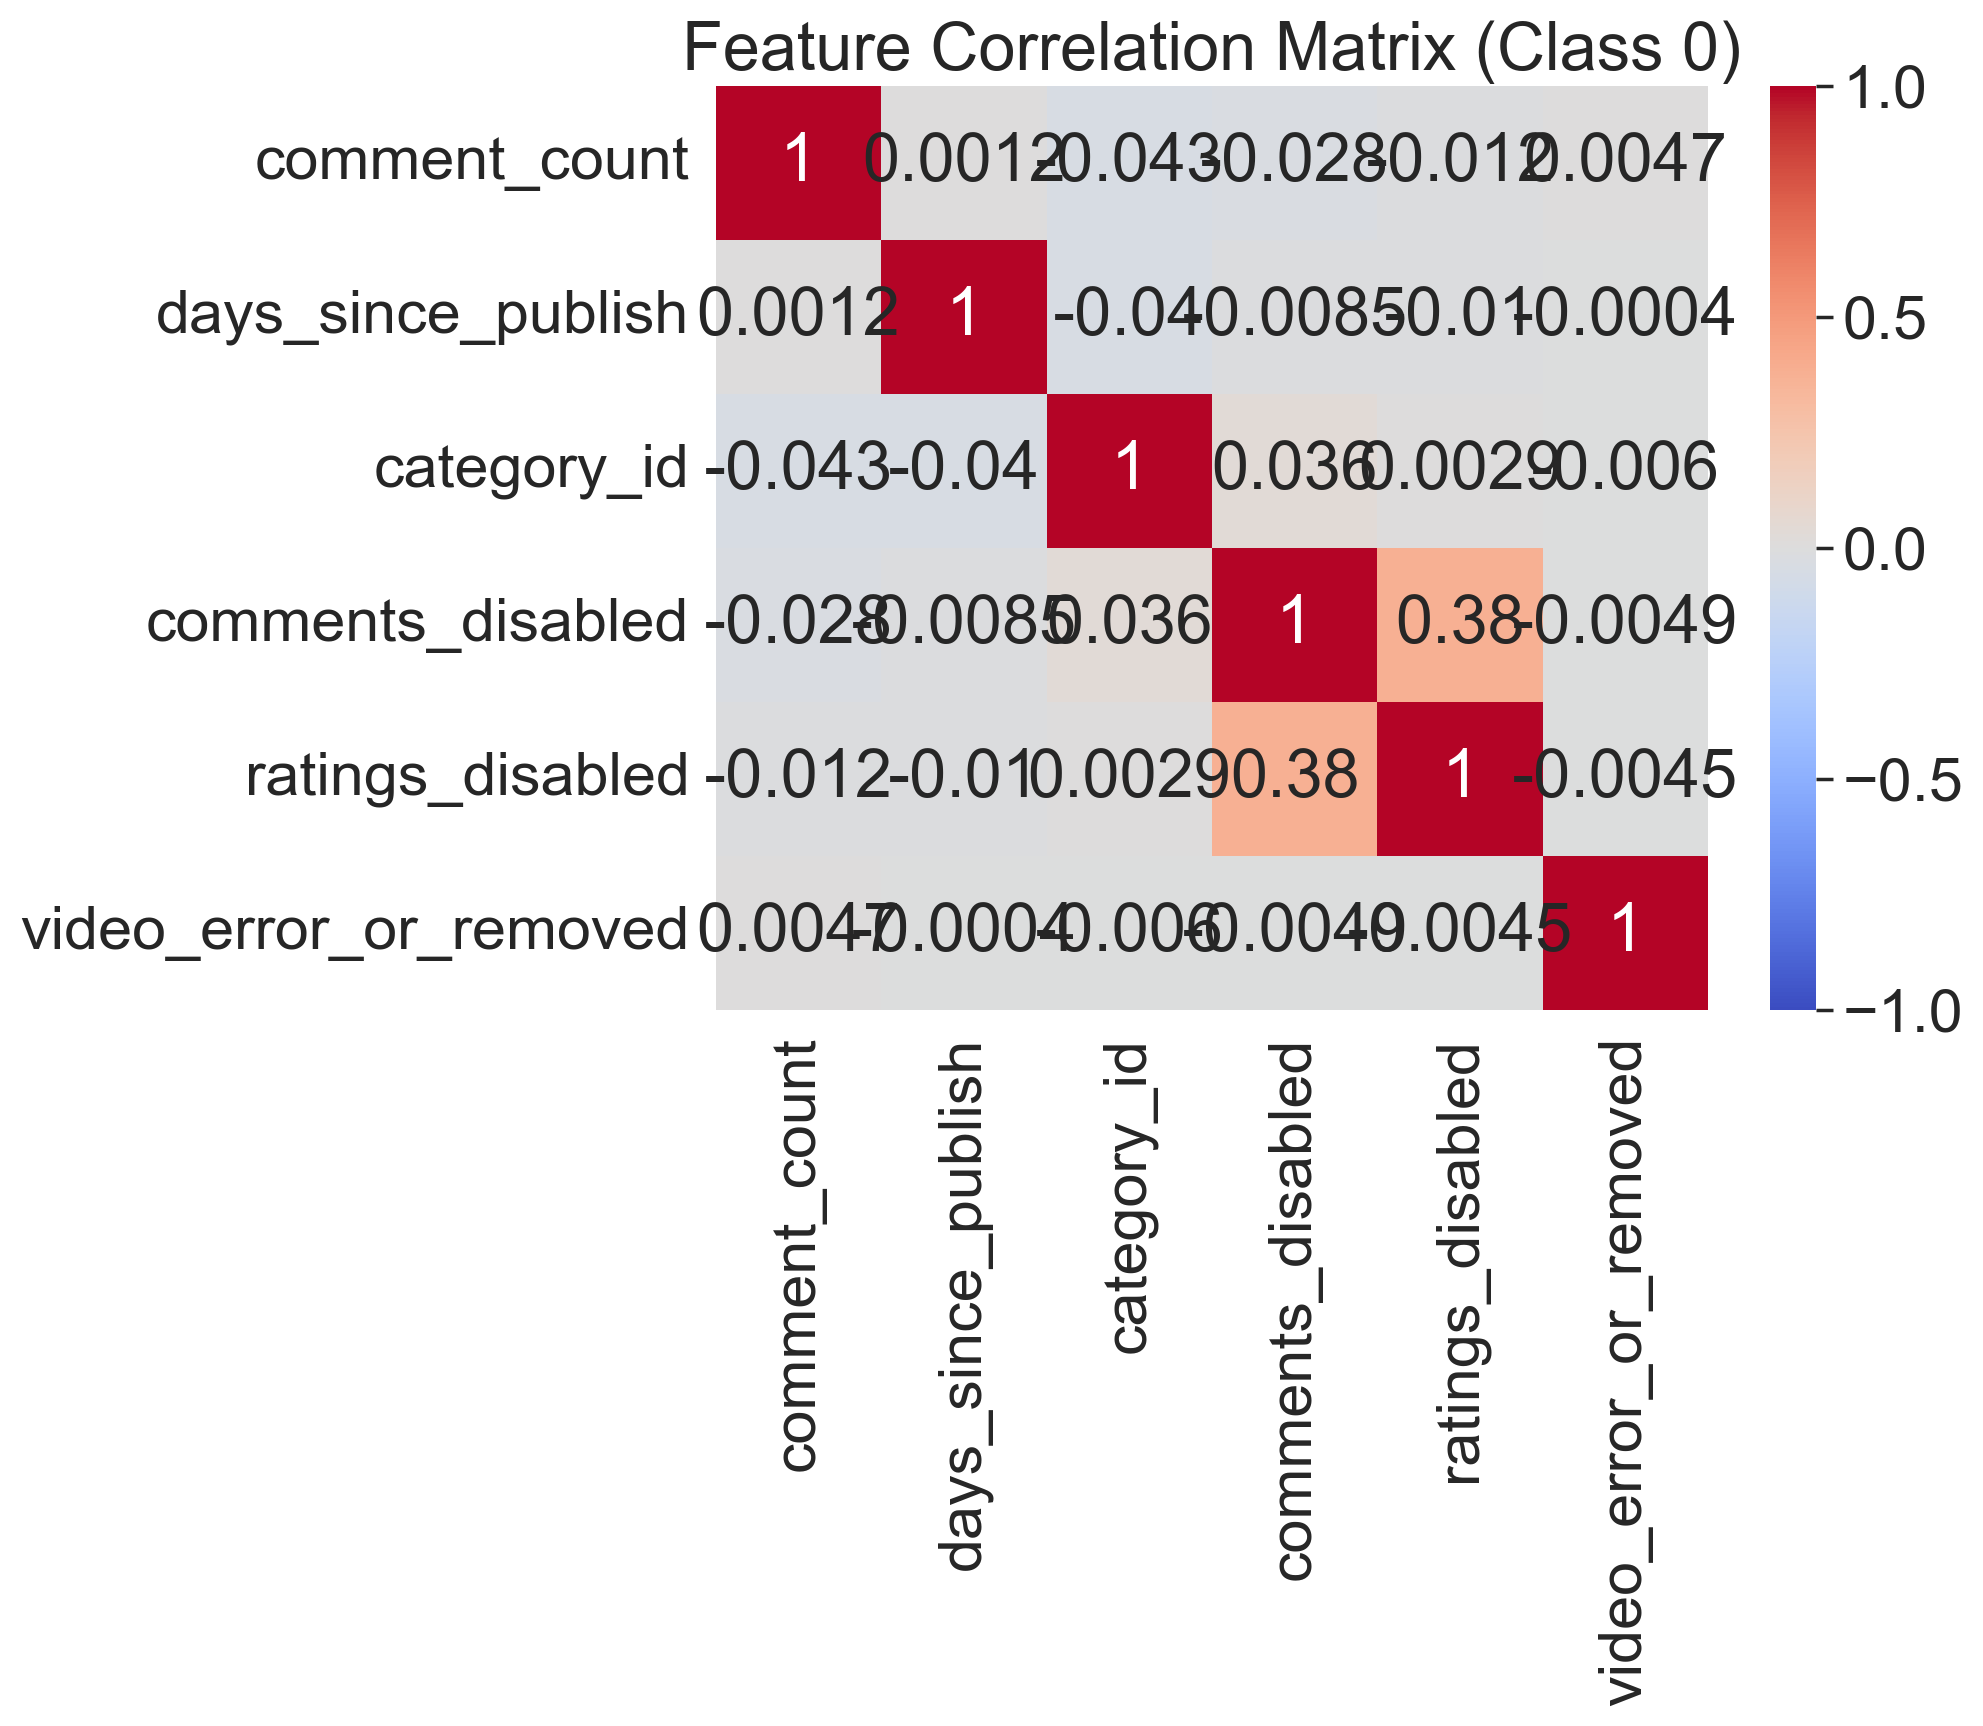

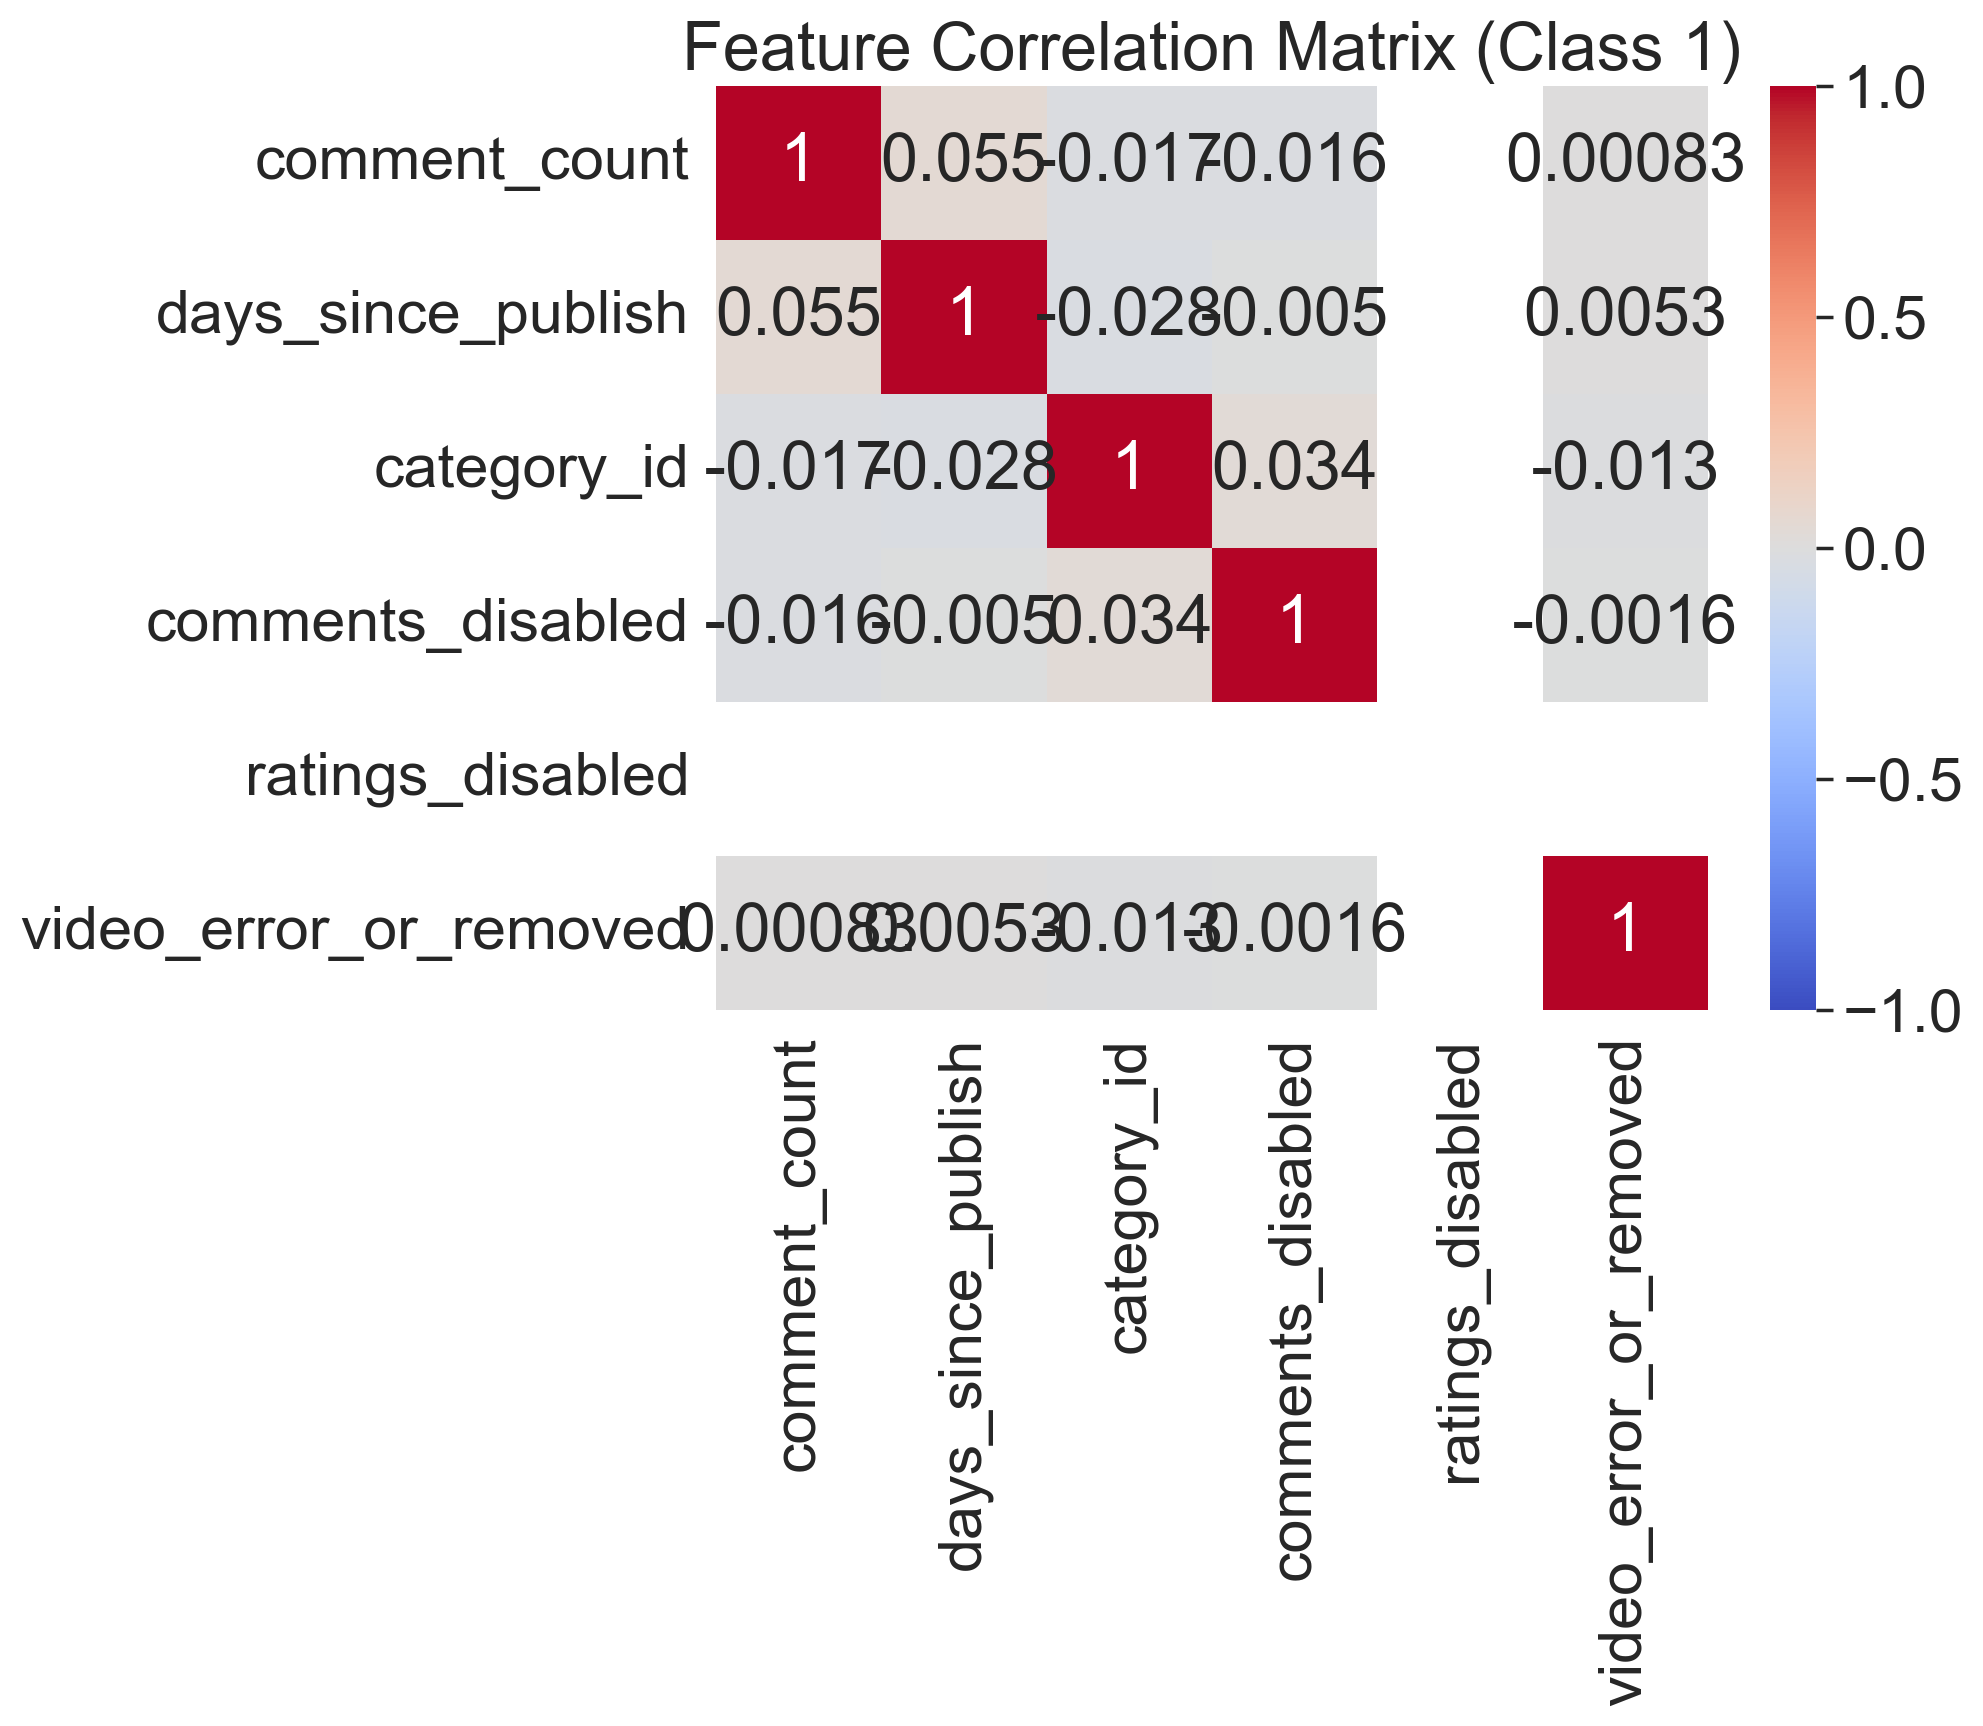

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

for label in y.unique():
    corr = X[y == label].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Feature Correlation Matrix (Class {label})')
    plt.show()